# PRCP-1004-Fifa20:

## Problem Statement:

Task 1:-Prepare a complete data analysis report on the given data.

Task 2:- Explore football skills and cluster football players based on their attributes.

Task3:
        ●Prepare a rank ordered list of top 10 countries with most players. Which countries are producing the most footballers that play at this level?
        ● Plot the distribution of overall rating vs. age of players. Interpret what is the age after which a player stops improving?
        ● Which type of offensive players tends to get paid the most: the striker, the right-winger, or the left-winger? 



## Importing with Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

# Data Read:

In [2]:
data = pd.read_csv('players_20.csv')
data.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [3]:
data.tail()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
18273,245006,https://sofifa.com/player/245006/shuai-shao/20...,Shao Shuai,邵帅,22,1997-03-10,186,79,China PR,Beijing Renhe FC,...,43+2,42+2,42+2,42+2,43+2,45+2,46+2,46+2,46+2,45+2
18274,250995,https://sofifa.com/player/250995/mingjie-xiao/...,Xiao Mingjie,Mingjie Xiao,22,1997-01-01,177,66,China PR,Shanghai SIPG FC,...,44+2,43+2,43+2,43+2,44+2,46+2,47+2,47+2,47+2,46+2
18275,252332,https://sofifa.com/player/252332/wei-zhang/20/...,Zhang Wei,张威,19,2000-05-16,186,75,China PR,Hebei China Fortune FC,...,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2
18276,251110,https://sofifa.com/player/251110/haijian-wang/...,Wang Haijian,汪海健,18,2000-08-02,185,74,China PR,Shanghai Greenland Shenhua FC,...,48+2,48+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2
18277,233449,https://sofifa.com/player/233449/ximing-pan/20...,Pan Ximing,潘喜明,26,1993-01-11,182,78,China PR,Hebei China Fortune FC,...,48+2,49+2,49+2,49+2,48+2,48+2,50+2,50+2,50+2,48+2


In [4]:
data.shape

(18278, 104)

In [5]:
columns1 = list(data.columns)
print(columns1)

['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob', 'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions', 'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'team_position', 'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until', 'nation_position', 'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


In [7]:
data.describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,...,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,219738.864482,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,...,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,27960.200461,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,...,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,768.000000,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,...,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,204445.500000,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,...,39.000000,51.000000,29.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,226165.000000,25.000000,181.000000,75.000000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,3.000000,...,49.000000,60.000000,52.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,240795.750000,29.000000,186.000000,80.000000,71.000000,75.000000,2.100000e+06,8000.000000,1.000000,3.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,252905.000000,42.000000,205.000000,110.000000,94.000000,95.000000,1.055000e+08,565000.000000,5.000000,5.000000,...,92.000000,96.000000,94.000000,92.000000,90.000000,90.000000,92.000000,93.000000,91.000000,92.000000


In [8]:
data.describe(include='O')

,player_url,short_name,long_name,dob,nationality,club,player_positions,preferred_foot,work_rate,body_type,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
count,18278,18278,18278,18278,18278,18278,18278,18278,18278,18278,...,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242
unique,18278,17354,18218,6142,162,698,643,2,9,10,...,98,98,98,98,98,96,110,110,110,96
top,https://sofifa.com/player/158023/lionel-messi/...,J. Rodríguez,Liam Kelly,1992-02-29,England,FC Barcelona,CB,Right,Medium/Medium,Normal,...,59+2,59+2,59+2,59+2,59+2,61+2,63+2,63+2,63+2,61+2
freq,1,11,3,113,1667,33,2322,13960,9875,10750,...,682,636,636,636,682,667,621,621,621,667


# Missing value:

In [9]:
data.isnull().sum()

sofifa_id        0
player_url       0
short_name       0
long_name        0
age              0
              ... 
lb            2036
lcb           2036
cb            2036
rcb           2036
rb            2036
Length: 104, dtype: int64

In [10]:
data.shape

(18278, 104)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


In [12]:
data.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=104)

## Exploratory Data Analysis (EDA):

In [13]:
data['nationality'].value_counts().head()

nationality
England      1667
Germany      1216
Spain        1035
France        984
Argentina     886
Name: count, dtype: int64

# Count plot:

### Nationality in FIFA-20:

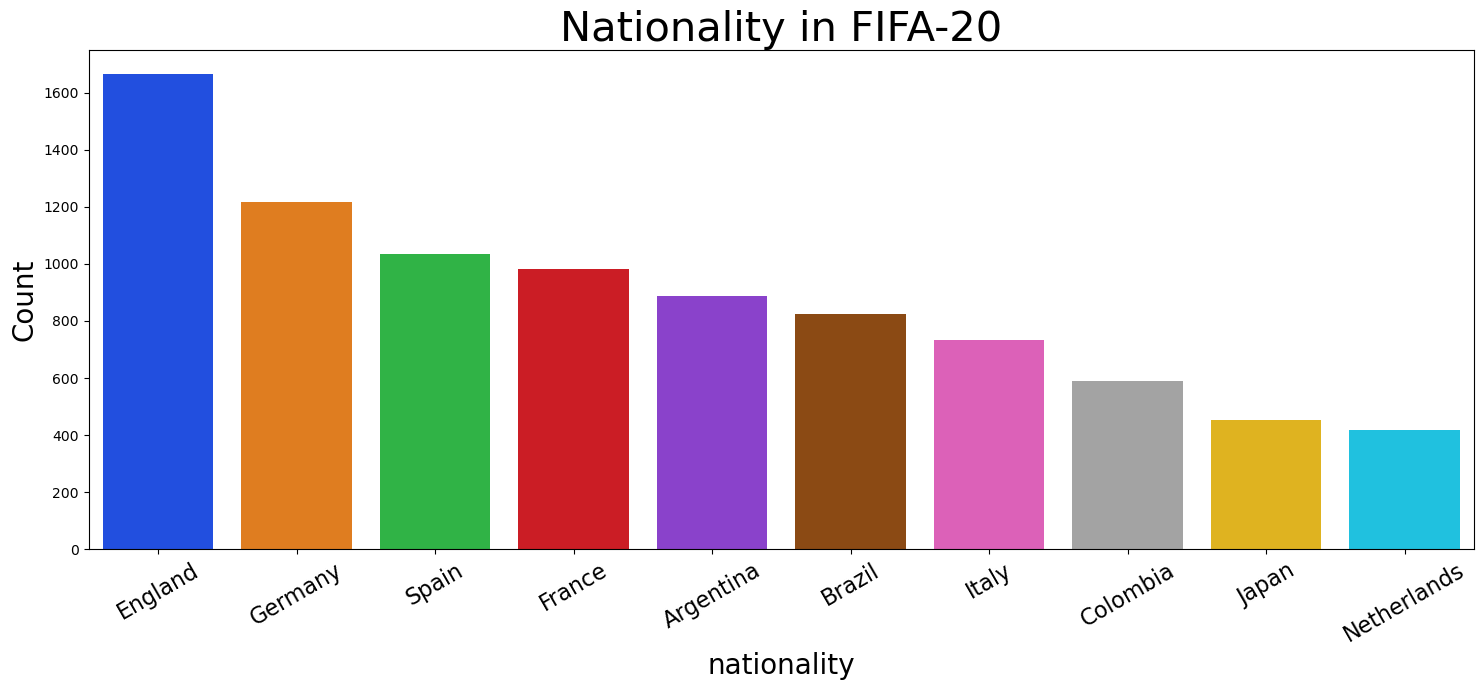

In [14]:
plt.figure(figsize=(15,7))
sns.countplot(x='nationality',data=data,palette='bright',order=data.nationality.value_counts().iloc[:10].index)
plt.title('Nationality in FIFA-20',fontsize=30)
plt.xlabel('nationality',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=30,fontsize=16)
plt.tight_layout()
plt.show()

In [15]:
data['age'].value_counts()

age
22    1446
21    1375
23    1358
27    1324
25    1319
24    1296
26    1270
20    1247
28    1086
19    1011
29     999
30     883
31     807
18     640
32     597
33     475
35     310
34     301
17     229
36     131
37      81
38      42
39      20
40      13
16      12
41       4
42       2
Name: count, dtype: int64

# Dist plot:

### Age Distribution of Players in FIFA-20:

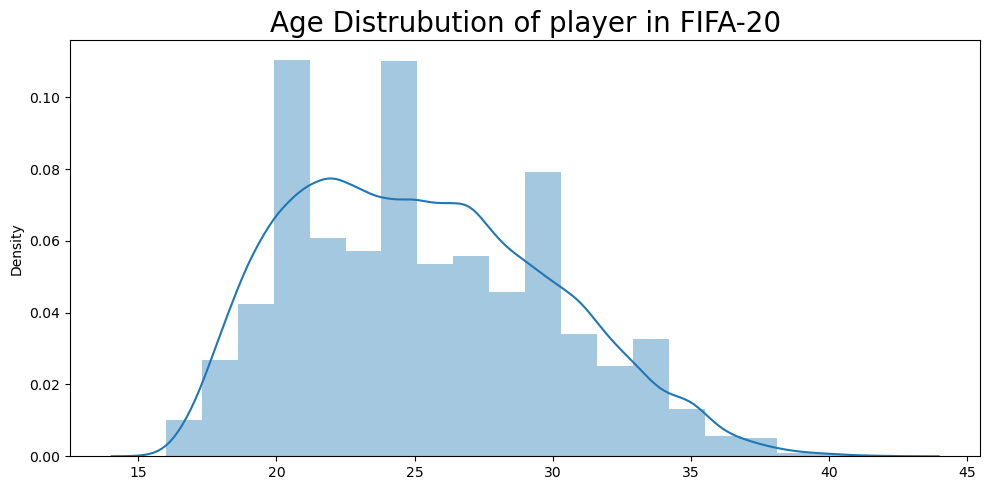

In [16]:
plt.figure(figsize=(10,5))
sns.distplot(x=data['age'],kde=True,bins=20)
plt.title('Age Distrubution of player in FIFA-20', fontsize=20)
plt.tight_layout()
plt.show()

# Count plot:

### Age count of FIFA-20 Players:

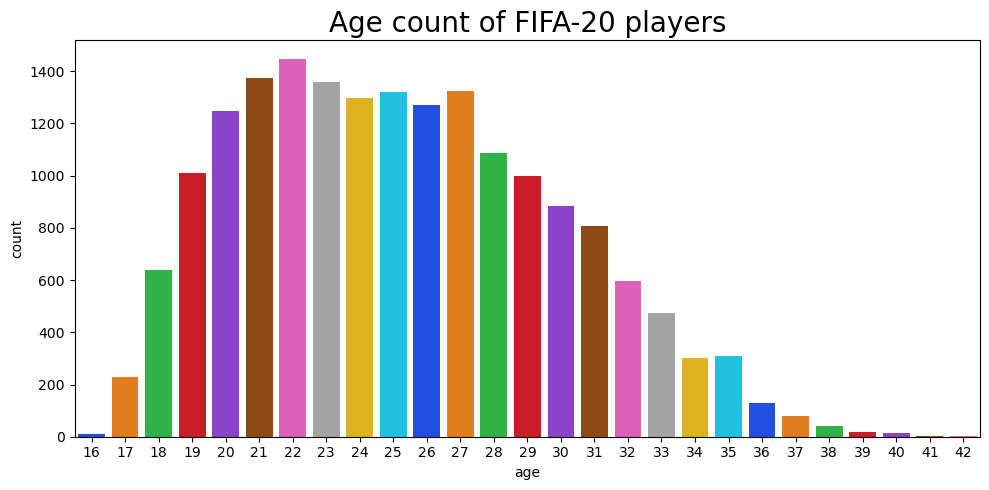

In [17]:
plt.figure(figsize=(10,5))
plt.title('Age count of FIFA-20 players',fontsize=20)
sns.countplot(x='age',data=data,palette='bright')
plt.tight_layout()
plt.show()

In [18]:
data['club'].value_counts()

club
FC Barcelona                  33
Real Valladolid CF            33
VfL Wolfsburg                 33
Crystal Palace                33
Eintracht Frankfurt           33
                              ..
US Orléans Loiret Football     1
Canada                         1
Mexico                         1
Turkey                         1
Śląsk Wrocław                  1
Name: count, Length: 698, dtype: int64

# Count plot:

### Club of count in FIFA-20:

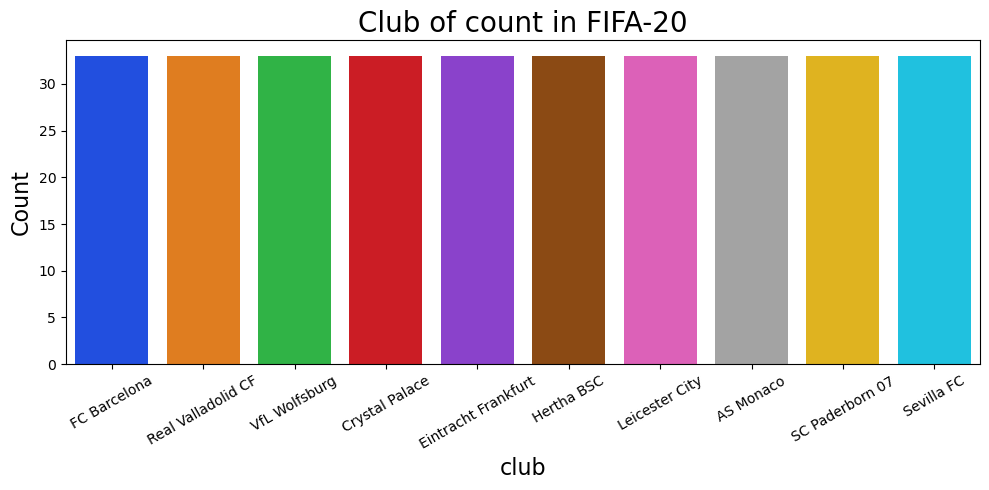

In [19]:
plt.figure(figsize=(10,5))
plt.title('Club of count in FIFA-20',fontsize=20)
sns.countplot(x='club',data=data,palette='bright',order=data.club.value_counts().iloc[:10].index)
plt.xlabel(xlabel='club',fontsize=16)
plt.ylabel(ylabel='Count',fontsize=16)
plt.xticks(rotation=30,fontsize=10)
plt.tight_layout()
plt.show()

# Dist plot:

### Height Distribution of FIFA-20 Players:

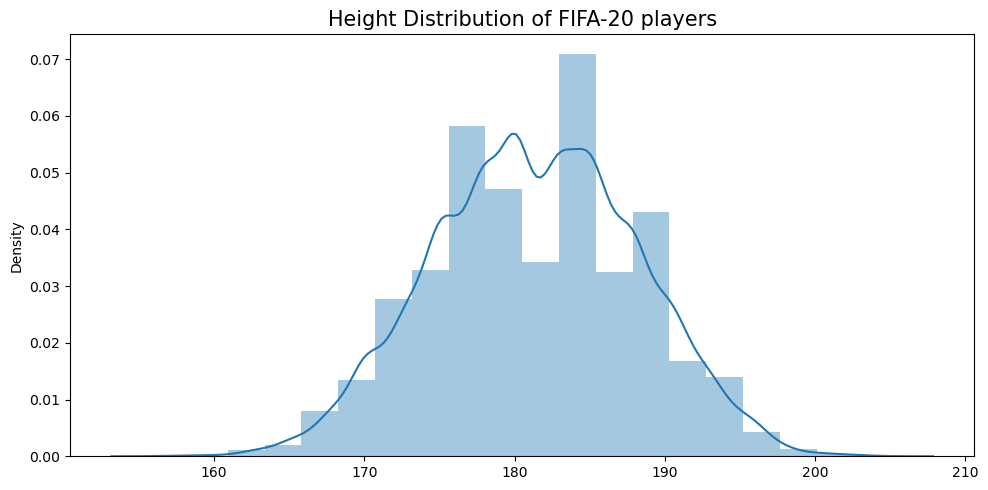

In [20]:
plt.figure(figsize=(10,5))
plt.title('Height Distribution of FIFA-20 players', fontsize=15)
sns.distplot(x=data['height_cm'],kde=True,bins=20)
plt.tight_layout()
plt.show()

# Count plot:

### Preferred foot count of FIFA20 Players:

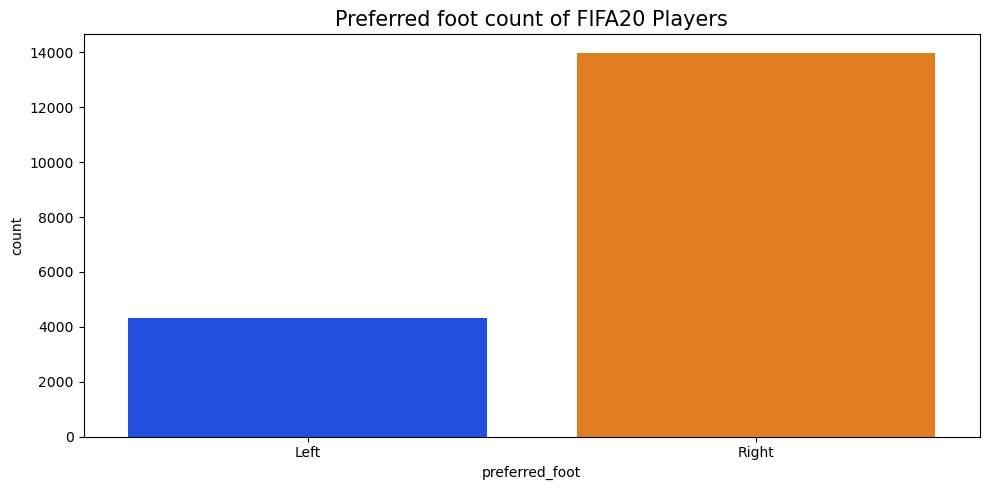

In [21]:
plt.figure(figsize=(10,5))
plt.title('Preferred foot count of FIFA20 Players',fontsize=15)
sns.countplot(x='preferred_foot',data=data,palette='bright')
plt.tight_layout()
plt.show()

# Line plot:

### Age vs Overall:

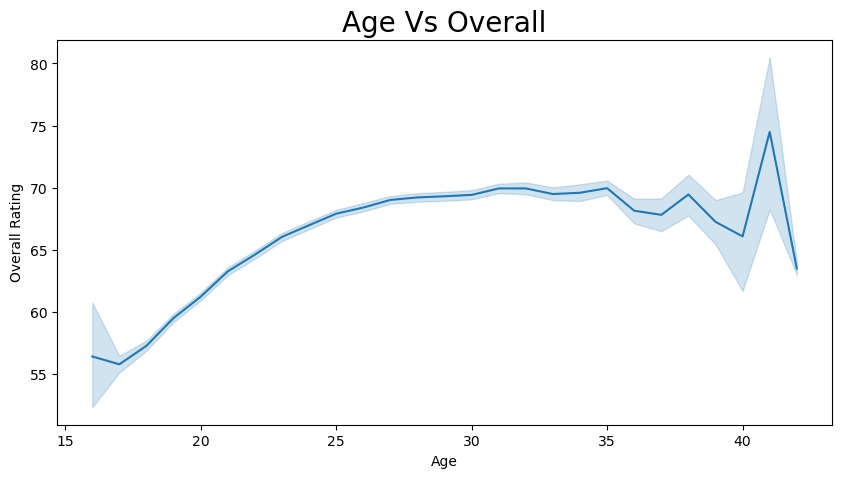

In [22]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=data, x='age', y='overall', palette='Wistia')
plt.title('Age Vs Overall', fontsize=20)
plt.xlabel('Age')
plt.ylabel('Overall Rating')
plt.show()

# Line plot:

### Age vs Potential:

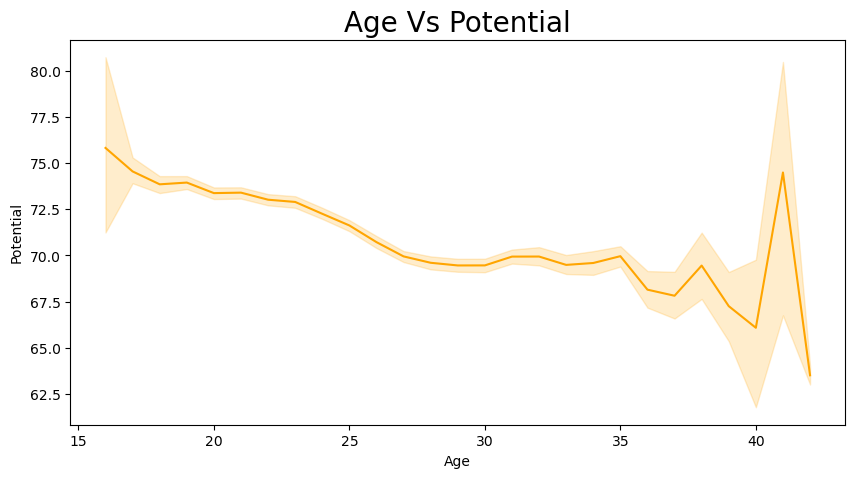

In [23]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=data, x='age', y='potential', color='orange')
plt.title('Age Vs Potential', fontsize=20)
plt.xlabel('Age')
plt.ylabel('Potential')
plt.show()

# Scatter plot:

### Overall vs value_eur:

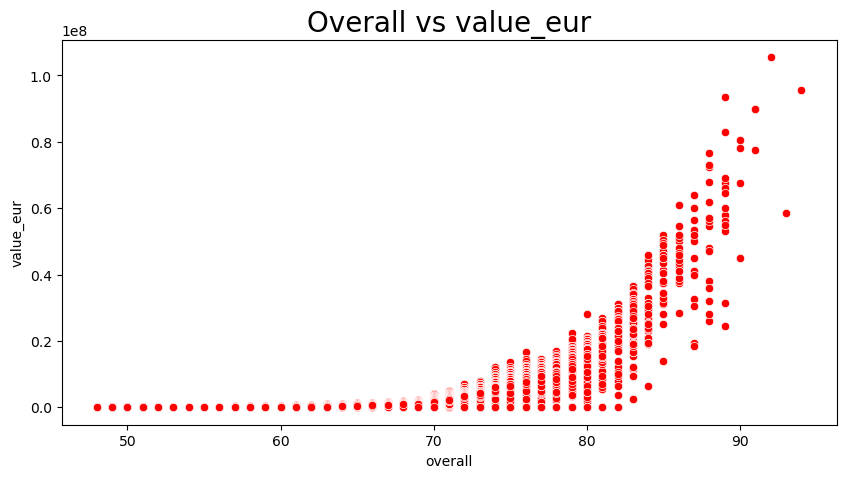

In [24]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='overall',y='value_eur',data=data,color='red')
plt.title('Overall vs value_eur',fontsize=20)
plt.show()

In [25]:
#Analysis of goalkeepr 
data_gk = data.loc[data['team_position']=='GK']
data_gk.head(1)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Missing values:

In [26]:
data_gk.isnull().sum()

sofifa_id       0
player_url      0
short_name      0
long_name       0
age             0
             ... 
lb            662
lcb           662
cb            662
rcb           662
rb            662
Length: 104, dtype: int64

In [27]:
data_gk['age'].value_counts().head()

age
26    59
28    57
27    55
30    52
25    41
Name: count, dtype: int64

# Dist plot:

###  Age distribution of Goalkeepers in FIFA20:

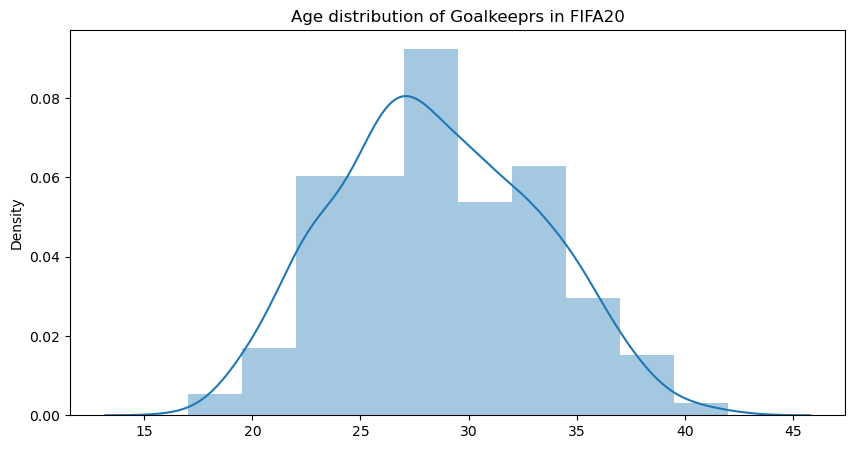

In [28]:
plt.figure(figsize=(10,5))
plt.title('Age distribution of Goalkeeprs in FIFA20')
sns.distplot(x=data_gk['age'],kde=True,bins=10)
plt.show()

# Dist plot:

### Overall Distribution of Goalkeeper Players:

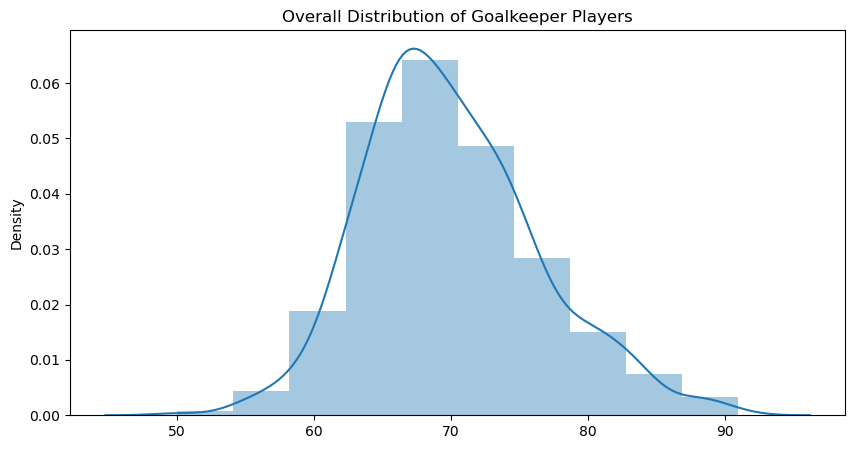

In [29]:
plt.figure(figsize=(10,5))
plt.title('Overall Distribution of Goalkeeper Players')
sns.distplot(x=data_gk['overall'],kde=True,bins=10)
plt.show()
#Overall distribution of goalkeepr 
#Goal keepers have overall value in the range 50-90, with a mean of 69.

# Dist plot:

### Wage_eur distribution of Goalkeepers:

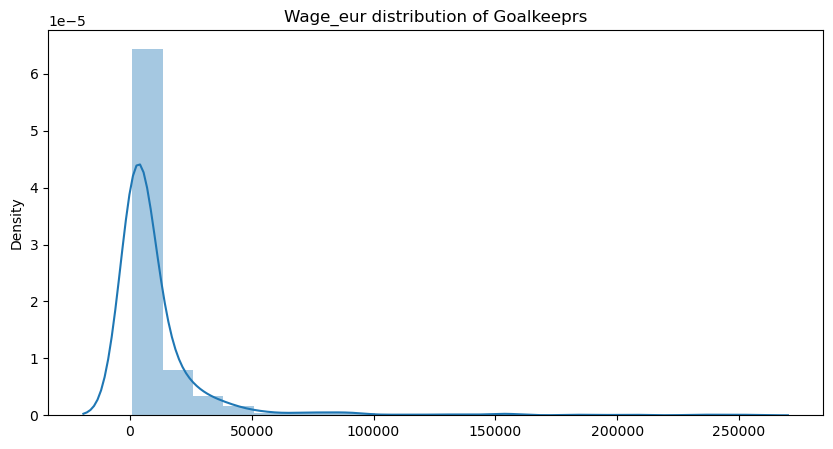

In [30]:
plt.figure(figsize=(10,5))
plt.title('Wage_eur distribution of Goalkeeprs')
sns.distplot(x=data_gk['wage_eur'],kde=True,bins=20)
plt.show()
#wage distribution of Goalkeeprs

In [31]:
data=pd.read_csv('players_20.csv')
data.head(1)
data.shape

(18278, 104)

In [32]:
data = data[['age', 'height_cm', 'weight_kg', 'overall', 'potential',
'value_eur', 'wage_eur', 'international_reputation', 'weak_foot',
'skill_moves', 'release_clause_eur', 'team_jersey_number',
'contract_valid_until', 'nation_jersey_number', 'pace', 'shooting',
'passing', 'dribbling', 'defending', 'physic', 'gk_diving',
'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
'gk_positioning', 'attacking_crossing', 'attacking_finishing',
'attacking_heading_accuracy', 'attacking_short_passing',
'attacking_volleys', 'skill_dribbling', 'skill_curve',
'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
'movement_reactions', 'movement_balance', 'power_shot_power',
'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
'mentality_aggression', 'mentality_interceptions',
'mentality_positioning', 'mentality_vision', 'mentality_penalties',
'mentality_composure', 'defending_marking', 'defending_standing_tackle',
'defending_sliding_tackle', 'goalkeeping_diving',
'goalkeeping_handling', 'goalkeeping_kicking',
'goalkeeping_positioning', 'goalkeeping_reflexes']]

In [33]:
data = data[data.overall > 85] 
# extracting players with overall above 85
data

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,32,170,72,94,94,95500000,565000,5,4,4,...,75,96,33,37,26,6,11,15,14,8
1,34,187,83,93,93,58500000,405000,5,4,5,...,85,95,28,32,24,7,11,15,14,11
2,27,175,68,92,92,105500000,290000,5,5,5,...,90,94,27,26,29,9,9,15,15,11
3,26,188,87,91,93,77500000,125000,3,3,1,...,11,68,27,12,18,87,92,78,90,89
4,28,175,74,91,91,90000000,470000,4,4,4,...,88,91,34,27,22,11,12,6,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,27,172,68,86,86,46500000,175000,3,4,5,...,70,77,55,54,47,12,7,9,14,6
69,30,182,74,86,86,41000000,69000,2,4,3,...,83,85,69,68,65,5,9,12,14,8
70,29,186,75,86,86,43500000,170000,4,4,3,...,60,84,44,57,46,6,7,11,14,14
71,29,185,85,86,86,44500000,105000,3,4,3,...,78,81,34,33,32,6,8,15,12,6


In [34]:
data = data.fillna(data.mean())

# MinMaxScaler:

In [35]:
from sklearn import preprocessing
x = data.values
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled)
X_norm

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.857143,0.194444,0.351351,1.000,0.888889,0.885057,1.000000,1.00,0.75,0.75,...,0.810127,1.000000,0.227848,0.329268,0.219512,0.045455,0.100000,0.142857,0.136364,0.056180
1,1.000000,0.666667,0.648649,0.875,0.777778,0.459770,0.677419,1.00,0.75,1.00,...,0.936709,0.967742,0.164557,0.268293,0.195122,0.056818,0.100000,0.142857,0.136364,0.089888
2,0.500000,0.333333,0.243243,0.750,0.666667,1.000000,0.445565,1.00,1.00,1.00,...,1.000000,0.935484,0.151899,0.195122,0.256098,0.079545,0.077778,0.142857,0.147727,0.089888
3,0.428571,0.694444,0.756757,0.625,0.777778,0.678161,0.112903,0.50,0.50,0.00,...,0.000000,0.096774,0.151899,0.024390,0.121951,0.965909,1.000000,0.835165,1.000000,0.966292
4,0.571429,0.333333,0.405405,0.625,0.555556,0.821839,0.808468,0.75,0.75,0.75,...,0.974684,0.838710,0.240506,0.207317,0.170732,0.102273,0.111111,0.043956,0.068182,0.056180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,0.500000,0.250000,0.243243,0.000,0.000000,0.321839,0.213710,0.50,0.75,1.00,...,0.746835,0.387097,0.506329,0.536585,0.475610,0.113636,0.055556,0.076923,0.136364,0.033708
69,0.714286,0.527778,0.405405,0.000,0.000000,0.258621,0.000000,0.25,0.75,0.50,...,0.911392,0.645161,0.683544,0.707317,0.695122,0.034091,0.077778,0.109890,0.136364,0.056180
70,0.642857,0.638889,0.432432,0.000,0.000000,0.287356,0.203629,0.75,0.75,0.50,...,0.620253,0.612903,0.367089,0.573171,0.463415,0.045455,0.055556,0.098901,0.136364,0.123596
71,0.642857,0.611111,0.702703,0.000,0.000000,0.298851,0.072581,0.50,0.75,0.50,...,0.848101,0.516129,0.240506,0.280488,0.292683,0.045455,0.066667,0.142857,0.113636,0.033708


# PCA:

In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2) # 2D PCA for the plot
reduced = pd.DataFrame(pca.fit_transform(X_norm))
reduced

,0,1
0,-1.332410,-1.344567
1,-1.021370,-0.995609
2,-1.207853,-1.498127
3,3.075986,-0.784658
4,-1.086549,-1.283309
...,...,...
68,-0.910943,-0.498714
69,-0.561330,0.553690
70,-0.551749,-0.043101
71,-0.326704,-0.327499


# K-Means:

In [37]:
from sklearn.cluster import KMeans



kmeans = KMeans(n_clusters=5)
kmeans = kmeans.fit(reduced)
labels = kmeans.predict(reduced)
centroid = kmeans.cluster_centers_
clusters = kmeans.labels_.tolist()
clusters

[3,
 3,
 3,
 1,
 3,
 0,
 1,
 2,
 0,
 3,
 3,
 2,
 0,
 1,
 1,
 4,
 2,
 3,
 4,
 0,
 0,
 2,
 0,
 3,
 4,
 1,
 3,
 0,
 1,
 2,
 1,
 1,
 1,
 0,
 0,
 2,
 4,
 3,
 3,
 3,
 2,
 0,
 2,
 3,
 4,
 2,
 0,
 2,
 3,
 2,
 2,
 4,
 0,
 1,
 3,
 3,
 2,
 2,
 4,
 2,
 1,
 4,
 0,
 0,
 4,
 4,
 0,
 2,
 0,
 4,
 0,
 0,
 0]

# Elbow Method:

### Elbow Method for Optimal K:

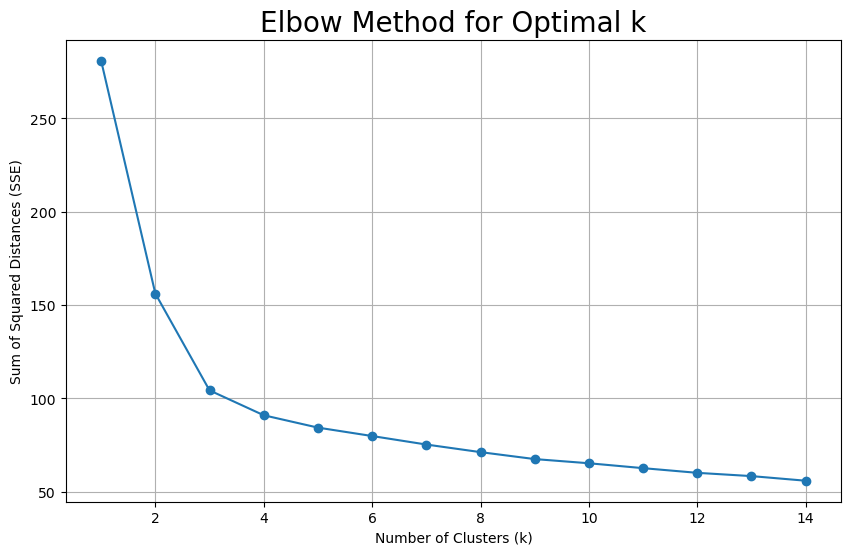

In [38]:
# Assuming X_norm is your DataFrame
X_norm.columns = X_norm.columns.astype(str)  # Convert all column names to strings

# Now proceed with KMeans
from sklearn.cluster import KMeans

sse = {}
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=42)  # Added random_state for reproducibility
    kmeans.fit(X_norm)
    X_norm["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_  # Save the sum of squared distances to the closest cluster center

# Now you can plot the SSE vs. K to find the optimal number of clusters
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(list(sse.keys()), list(sse.values()), marker='o')
plt.title('Elbow Method for Optimal k', fontsize = 20)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.grid()
plt.show()

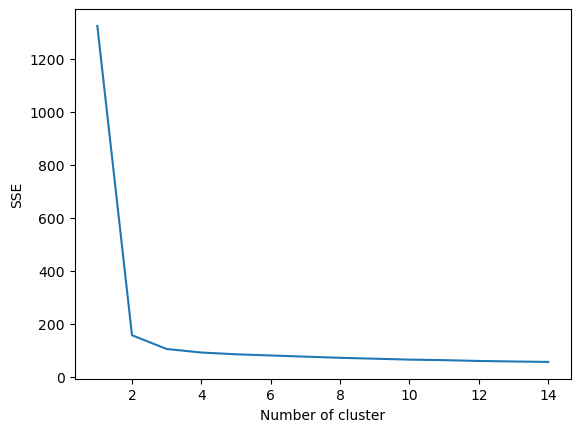

In [39]:
import numpy as np
from sklearn.cluster import KMeans

# Ensure all columns are strings
X_norm.columns = X_norm.columns.astype(str)

# Filter out non-numeric columns
X_norm = X_norm.select_dtypes(include=[np.number])

# KMeans clustering
sse = {}
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X_norm)
    X_norm["clusters"] = kmeans.labels_
    # Print or store the sum of squared errors (sse)
    sse[k] = kmeans.inertia_
    
    
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [40]:
reduced['cluster'] = clusters
reduced.columns = ['x','y','cluster']
reduced.head()

,x,y,cluster
0,-1.332410,-1.344567,3
1,-1.021370,-0.995609,3
2,-1.207853,-1.498127,3
3,3.075986,-0.784658,1
4,-1.086549,-1.283309,3


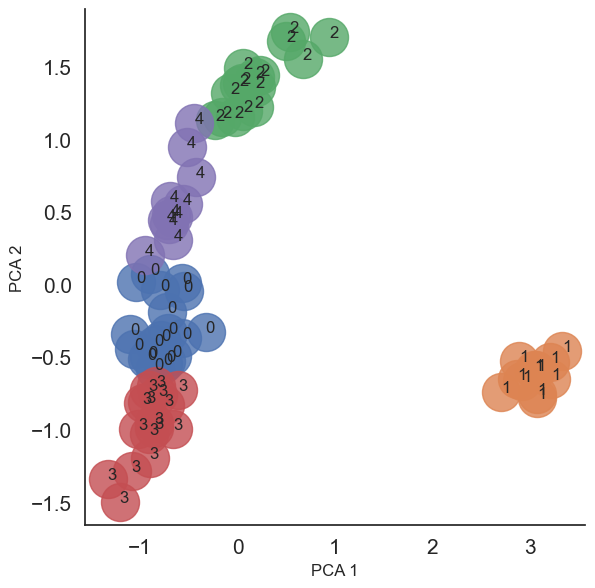

In [41]:
# Assuming 'reduced' is a DataFrame with columns 'x', 'y', and 'cluster'
sns.set(style="white")

# Update 'size' to 'height' in the lmplot call
ax = sns.lmplot(x="x", y="y", hue='cluster', data=reduced, height=6, legend=False, fit_reg=False, scatter_kws={"s": 750})

# Adjusting text labels (if needed)
texts = []
for x, y, s in zip(reduced.x, reduced.y, reduced.cluster):
    texts.append(plt.text(x, y, s))
    
plt.tick_params(labelsize=15)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")


plt.show()

# Silhouette_score:

In [42]:
from sklearn.metrics import silhouette_score

silhouette_score(reduced, labels)

0.8422014762552034